# SI 618 - Homework #1: Data Manipulation

Version 2021.02.01.01.CT

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  


A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses  (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) for detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

<span style="color:magenta"> NOTE: You will only need the file named "athlete_events.csv" </span>

In [1]:
MY_UNIQNAME = 'natmay' # please fill in your uniqname

In [2]:
# Run but do not modify this cell
import numpy as np
MY_UNIQHASH = hash(MY_UNIQNAME) & 2**32-1
np.random.seed(MY_UNIQHASH)

## Answer the following questions.
Points for each question are shown below.

For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### <span style="color:magenta"> Q1: 5 pt: Describe the dataset. </span>
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [78]:
import pandas as pd
olympians = pd.read_csv('/Users/nathanielmay/Downloads/athlete_events.csv') 

print(f'There are {len(olmpians)} rows & {len(olmpians.columns)} columns.')
olmpians.head(5)


There are 271116 rows & 15 columns.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


***Answer***: As one would expect from olympic data, the who (athlete), what (sport/medal winners), when (year/season), where (host city) is provided. Interestingly, the dataset also includes biometic information of the athletes, allowing us to examine which characteristics of the athletes tend to be more successful throughout history.

### <span style="color:magenta">Q2: 5 pt: Without using dataframe.describe(), calculate the median age, height, and weight for athletes in the data. Round your answer to the nearest hundredths. </span>

In [3]:
print(olympians['Age'].median())
print(olympians['Height'].median())
print(olympians['Weight'].median())

24.0
175.0
70.0


***Answer***: The average olympian is 24 years of age, 175 centimeters tall ( ~5'9" ), and weighs 70 kilograms ( ~154 lbs ).

### <span style="color:magenta">Q3: 5 pt: According to the data, how many unique cities have hosted the Olympic games? How many cities have hosted multiple times? Which ones? </span>
You will likely want to use drop_duplicates() on some subset of your athlete dataframe.

In [103]:
print(f'{len(pd.unique(olympians.City))} unique cities')

pair = olympians[['City', 'Year']].drop_duplicates()
grouped = pair.groupby('City').count()
grouped[grouped.Year > 1].sort_values(by=['Year'], ascending=False)

42 unique cities


,Year
City,
Athina,3
London,3
Innsbruck,2
Lake Placid,2
Los Angeles,2
Paris,2
Sankt Moritz,2
Stockholm,2


***Answer***: 42 uniuqe cities have hosted the olympics. Innsbruck, Lake Placid, Los Angeles, Paris, Sankt Moritz, and Stockholm have each hosted twice, while Athina and London have hosted 3 times each.



### <span style="color:magenta">Q4: 10 pt: Generate histogram plots for the average age, weight, and height for Danish female athletes who competed in the 1970s. Describe the plots and point out any interesting aspects. </span>

In [75]:
den_fems_in_70s = olmpians[
    (olmpians.Sex == 'F') & 
    (olmpians.Team.str.contains('Denmark')) & 
    (olmpians.Year // 10 == 197)
]

den_fems_in_70s.groupby('Year').mean()


,ID,Age,Height,Weight
Year,,,,
1972,80265.833333,27.888889,171.222222,62.000000
1976,70605.461538,24.461538,167.153846,60.583333


Year
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

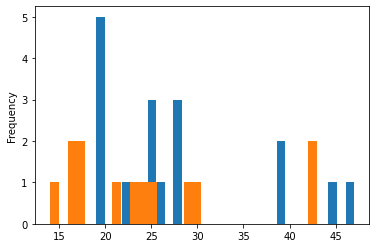

In [72]:
den_fems_in_70s.groupby('Year').Age.plot.hist(bins=30)


Year
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Height, dtype: object

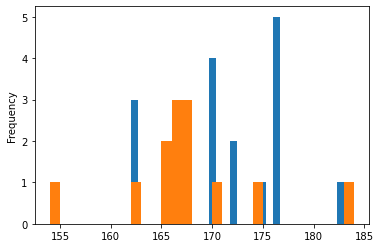

In [73]:
den_fems_in_70s.groupby('Year').Height.plot.hist(bins=30)

Year
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Weight, dtype: object

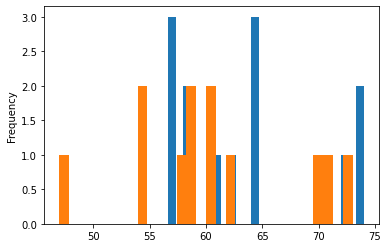

In [74]:
den_fems_in_70s.groupby('Year').Weight.plot.hist(bins=30)

***Answer***: Danish female olympians were younger on average in 1976 than 1972. While there were a few athletes in their 40s, there was a surprising lack of representation of female Danes in their 30s.

As for height, the majority were 170 cm ± 8 cm. There were a few outliners.

The distributions of weight were a bit surprising. There was signifant representation at 59 kilos ± 5 and solid representation in the 70-75 kilo range. However there is a surprising absense from 65-70 kilos.

### <span style="color:magenta">Q5: 10 pt: Which athlete competed in the most number of events? In which events did the athelete participate, and for what range of years? Which country did the athlete represent? </span>

In [108]:
pair = olympians[['Name', 'Event']].drop_duplicates()
grouped = pair.groupby('Name').count()
grouped.sort_values(by=['Event'], ascending=False).head(5)

,Event
Name,
Ioannis Theofilakis,33
Alexandros Theofilakis,28
Gustaf Eric Carlberg,24
Gustaf Vilhelm Carlberg,22
Frangiskos D. Mavrommatis,22


In [114]:
ioannis = olympians[olympians.Name == 'Ioannis Theofilakis']
pd.unique(ioannis.Event)

array(["Shooting Men's Free Rifle, Three Positions, 300 metres",
       "Shooting Men's Military Rifle, 200 metres",
       "Shooting Men's Free Rifle, Any Position, 300 metres",
       "Shooting Men's Military Rifle, 1873-1874 Gras Model, Kneeling Or Standing, 200 metres",
       "Shooting Men's Military Rifle, Kneeling Or Standing, 300 metres",
       "Shooting Men's Free Pistol, 50 yards",
       "Shooting Men's Free Pistol, 50 yards, Team",
       "Shooting Men's Free Rifle, Three Positions, 300 metres, Team",
       "Shooting Men's Military Rifle, 200/500/600/800/900/1,000 Yards, Team",
       "Shooting Men's Free Pistol, 50 metres",
       "Shooting Men's Free Pistol, 50 metres, Team",
       "Shooting Men's Dueling Pistol, 30 metres",
       "Shooting Men's Dueling Pistol, 30 metres, Team",
       "Shooting Men's Military Rifle, Three Positions, 300 metres",
       "Shooting Men's Military Rifle, Any Position, 600 metres",
       "Shooting Men's Military Rifle, 200, 400, 500 and

In [111]:
print(ioannis['Year'].min())
print(ioannis['Year'].max())

1896
1924


In [112]:
pd.unique(ioannis.Team)

array(['Greece'], dtype=object)

***Answer***: Ioannis Theofilakis competed in the most events: 33. He participated in shooting events (see full list in the output above) from 1896 to 1924 for team Greece.

### <span style="color:magenta">Q6: 10 pt: How many gold, silver, and bronze medals did Sawao Kato, one of the most successful Olympic athletes of all time, win during his Olympic career? What is the breakdown of events and medal types won for each? </span>

In [118]:
sawao = olympians[olympians.Name == 'Sawao Kato'][['Name', "Medal", "Event"]]
sawao.groupby('Medal').count()

,Name,Event
Medal,,
Bronze,1,1
Gold,8,8
Silver,3,3


In [133]:
import numpy as np
sawao['Medal'].replace(np.nan, 'No Medal', inplace=True)
sawao.groupby(['Medal', 'Event']).count()

Name
Medal    Event                                       
Bronze   Gymnastics Men's Rings                     1
Gold     Gymnastics Men's Floor Exercise            1
         Gymnastics Men's Individual All-Around     2
         Gymnastics Men's Parallel Bars             2
         Gymnastics Men's Team All-Around           3
No Medal Gymnastics Men's Floor Exercise            2
         Gymnastics Men's Horizontal Bar            2
         Gymnastics Men's Horse Vault               3
         Gymnastics Men's Parallel Bars             1
         Gymnastics Men's Pommelled Horse           2
         Gymnastics Men's Rings                     2
Silver   Gymnastics Men's Horizontal Bar            1
         Gymnastics Men's Individual All-Around     1
         Gymnastics Men's Pommelled Horse           1

***Answer***: In his career, Sawao Kato won 1 bronze, 3 silver, and 8 gold medals. 

His **Golds** came from, Gymnastics Men's Floor Exercise, Gymnastics Men's Individual All-Around (x2),  Gymnastics Men's Parallel Bars (x2), and Gymnastics Men's Team All-Around (x3).

His **Silvers** came from Gymnastics Men's Horizontal Bar, Gymnastics Men's Individual All-Around, and Gymnastics Men's Pommelled Horse.

His sole **Bronze** came from Gymnastics Men's Rings.

He also competede in but did not medal in several events, multiple times. See output above.

### <span style="color:magenta">Q7: 10 pt: Which sport has the highest median athlete age? </span>
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [137]:
olympians[['Sport', 'Age']].groupby('Sport').median().sort_values(by=['Age'], ascending=False).head(5)

,Age
Sport,
Roque,59.0
Art Competitions,45.0
Alpinism,38.0
Polo,35.0
Equestrianism,33.0


***Answer***: Roque has the highest median age. 

### <span style="color:magenta">Q8: 10 pt: Which country won the most medal points in all of the games held in 1992? </span>
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [143]:
points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, np.nan: 0}
ninty_two = olmpians[olmpians.Year == 1992][['Team', 'Medal']]
ninty_two['Points'] = ninty_two['Medal'].map(points)
ninty_two.groupby('Team').sum().sort_values(by=['Points'], ascending=False).head(5)

,Points
Team,
Unified Team,586
United States,477
Germany,476
Spain,185
Canada,175


***Answer***: The United States won the most medals of any single country in 1992 with 477. However, a group of 12 former Soviet republics chose to compete together as the 'Unified Team' winning 586 medals in total.

### <span style="color:magenta">Q9: 15 pt: The Soviet–American Cold War was a period of tension between the two superpowers between approximately the end of WWII and the late 1980s with the latent ideological tension playing out in a variety of ways including the Olympic Games. Which of the two countries won the most medals during the Cold War? </span>

Note that to answer this question you will need to determine reasonable values for the beginning and end years of the Cold War. There is no single correct answer and you should justify your choices, citing your sources as appropriate.

In [157]:
war_powers = olympians[(olympians.Team.str.contains('Soviet')) | (olympians.Team == 'United States')]
cold_war_olympics = war_powers[(war_powers.Year >= 1947) & (war_powers.Year <= 1991)]
cold_war_medals = cold_war_olympics[['Team', 'Medal']].dropna()
cold_war_medals.groupby('Team').count()

,Medal
Team,
Soviet Union,2451
Soviet Union-1,26
Soviet Union-2,24
United States,1888


***Answer***: The cold war lasted from 1947 to 1991. During this period the United States won 1,888 medals, fewer than the Soviet Union's 2,451. I am unsure about their nature, but there are another 50 recorded medals won during this period attributed to the teams 'Soviet Union-1' and 'Soviet Union-2'. 

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas